<a href="https://colab.research.google.com/github/bir-damla/fish_classification/blob/main/cnn_architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dir = "/content/drive/My Drive/dataset/kaggle_big_data_set/Fish_Dataset"
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        if os.path.splitext(filename)[1]=='.png':
            if dirname.split()[-1]!='GT':
                label.append(os.path.split(dirname)[1])
                path.append(os.path.join(dirname,filename))

df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [3]:
df.head()

path            label
0  /content/drive/My Drive/dataset/kaggle_big_dat...  Black Sea Sprat
1  /content/drive/My Drive/dataset/kaggle_big_dat...  Black Sea Sprat
2  /content/drive/My Drive/dataset/kaggle_big_dat...  Black Sea Sprat
3  /content/drive/My Drive/dataset/kaggle_big_dat...  Black Sea Sprat
4  /content/drive/My Drive/dataset/kaggle_big_dat...  Black Sea Sprat

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9036 entries, 0 to 9035
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9036 non-null   object
 1   label   9036 non-null   object
dtypes: object(2)
memory usage: 141.3+ KB


In [5]:
df['label']=df['label'].astype('category')

In [6]:
df['label'].value_counts()

label
Shrimp                1020
Striped Red Mullet    1010
Red Sea Bream         1004
Trout                 1002
Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Sea Bass              1000
Name: count, dtype: int64

# **Exploratory** **Data** **Analysis**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df['label'].unique()

['Black Sea Sprat', 'Gilt-Head Bream', 'Red Mullet', 'Hourse Mackerel', 'Sea Bass', 'Red Sea Bream', 'Shrimp', 'Trout', 'Striped Red Mullet']
Categories (9, object): ['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', ...,
                         'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']

In [9]:
df

path               label
0     /content/drive/My Drive/dataset/kaggle_big_dat...     Black Sea Sprat
1     /content/drive/My Drive/dataset/kaggle_big_dat...     Black Sea Sprat
2     /content/drive/My Drive/dataset/kaggle_big_dat...     Black Sea Sprat
3     /content/drive/My Drive/dataset/kaggle_big_dat...     Black Sea Sprat
4     /content/drive/My Drive/dataset/kaggle_big_dat...     Black Sea Sprat
...                                                 ...                 ...
9031  /content/drive/My Drive/dataset/kaggle_big_dat...  Striped Red Mullet
9032  /content/drive/My Drive/dataset/kaggle_big_dat...  Striped Red Mullet
9033  /content/drive/My Drive/dataset/kaggle_big_dat...  Striped Red Mullet
9034  /content/drive/My Drive/dataset/kaggle_big_dat...  Striped Red Mullet
9035  /content/drive/My Drive/dataset/kaggle_big_dat...  Striped Red Mullet

[9036 rows x 2 columns]

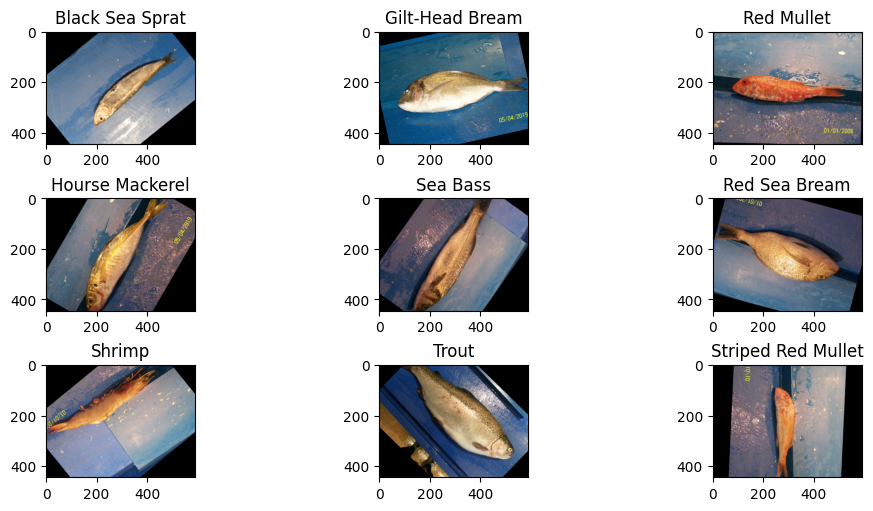

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,5), constrained_layout=True)
ax=ax.flatten()
j=0
for i in df['label'].unique():

    ax[j].imshow(plt.imread(df[df['label']==i].iloc[0,0]))
    ax[j].set_title(i)
    j=j+1

<Axes: xlabel='count', ylabel='label'>

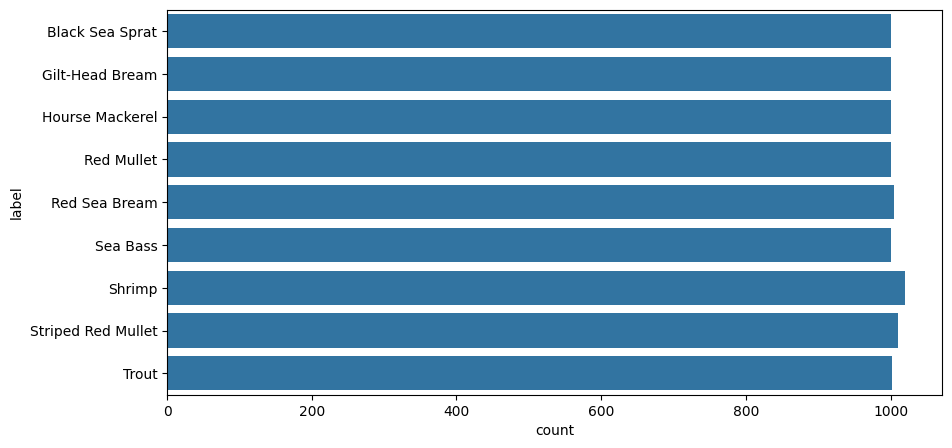

In [11]:
fig=plt.figure(figsize=(10,5))
sns.countplot(df['label'])

# **Train Test split**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test=train_test_split(df, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)

(7228, 2)
(1808, 2)


# **Tensorflow Model**


## **MobileNet**

 **Creating the image dataset using Tensorflow for MobileNet**

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.resnet import preprocess_input as preprocess_mobile_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainGen_mobile = ImageDataGenerator(preprocessing_function=preprocess_mobile_input, validation_split=0.3)
testGen_mobile =ImageDataGenerator(preprocessing_function= preprocess_mobile_input)
X_train_img_mobile = trainGen_mobile.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',class_mode='categorical', subset='training', color_mode='rgb', batch_size=64)
X_val_img_mobile = trainGen_mobile.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',class_mode='categorical', subset='validation', color_mode='rgb', batch_size=64)
X_test_img_mobile =testGen_mobile.flow_from_dataframe(dataframe=X_test, x_col='path', y_col='label',class_mode='categorical', color_mode='rgb', batch_size=64, shuffle=False)

Found 5060 validated image filenames belonging to 9 classes.
Found 2168 validated image filenames belonging to 9 classes.
Found 1808 validated image filenames belonging to 9 classes.


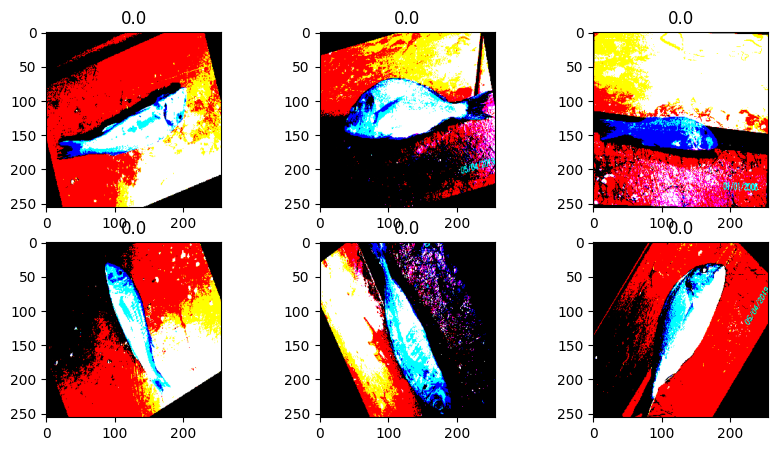

In [ ]:
fit_mobile, ax_mobile= plt.subplots(nrows=2, ncols=3, figsize=(10,5))
ax_mobile=ax_mobile.flatten()
j=0
for _ in range(6):
    img_mobile, label_mobile = X_test_img_mobile.next()
    #print(img.shape)   #  (1,256,256,3)
    ax_mobile[j].imshow(img_mobile[0],)
    ax_mobile[j].set_title(label_mobile[0][0])
    #plt.show()
    j=j+1

In [ ]:
X_test_img_mobile[0][0].shape

(64, 256, 256, 3)

In [ ]:
image_shape=(256,256,3)

In [ ]:
X_train_img_mobile.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [ ]:
X_val_img_mobile.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [ ]:
X_test_img_mobile.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
pre_trained= MobileNetV2(include_top=False, pooling='avg', input_shape=image_shape)

#for layers in pre_trained.layers:
#    layers.trainable=False
pre_trained.trainable=False

inp_model = pre_trained.input
#x=Flatten()(pre_trained.output)
x=Dense(128, activation='relu')(pre_trained.output)
x=Dropout(0.5)(x)
x=Dense(128, activation='relu')(x)
output=Dense(9, activation='softmax')(x)
model = Model(inputs=inp_model, outputs=output)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=1)

results = model.fit(X_train_img_mobile,epochs=30,
                              validation_data=X_val_img_mobile,
                                callbacks=[early_stop])

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/30
80/80 [==============================] - 3797s 48s/step - loss: 1.5978 - accuracy: 0.4168 - val_loss: 0.9335 - val_accuracy: 0.7089
Epoch 2/30
80/80 [==============================] - 316s 4s/step - loss: 0.9775 - accuracy: 0.6466 - val_loss: 0.5881 - val_accuracy: 0.7947
Epoch 3/30
80/80 [==============================] - 376s 5s/step - loss: 0.7262 - accuracy: 0.7342 - val_loss: 0.4117 - val_accuracy: 0.8695
Epoch 4/30
80/80 [==============================] - 316s 4s/step - loss: 0.5962 - accuracy: 0.7852 - val_loss: 0.3220 - val_accuracy: 0.8958
Epoch 5/30
80/80 [==============================] - 380s 5s/step - loss: 0.4695 - accuracy: 0.8291 - val_loss: 0.2954 - val_accuracy: 0.9045
Epoch 6/30
80/80 [==============================] - 363s 5s/step - loss: 0.4189 - accuracy: 0.8498 - val_loss: 0.2445 - val_accuracy: 0.9188
Epoch 7/30
80/80 [==============================] - 364s 5s/step - loss: 0.3695 - accurac

In [ ]:
model.save("mobile_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Model Prediction**

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("mobile_model.h5")

In [ ]:
predictions = loaded_model.predict(X_test_img_mobile)

29/29 [==============================] - 691s 24s/step


In [ ]:
pred=np.argmax(predictions,axis=1)

In [ ]:
pred_df=X_test.copy()
labels={}
for l,v in X_test_img_mobile.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

Accuracy Score: 0.9413716814159292


<Axes: >

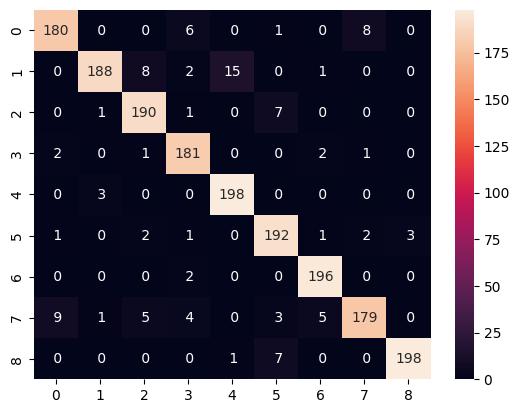

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')

                                                   path               label  \
8645  /content/drive/My Drive/dataset/kaggle_big_dat...  Striped Red Mullet   
1318  /content/drive/My Drive/dataset/kaggle_big_dat...     Gilt-Head Bream   
4785  /content/drive/My Drive/dataset/kaggle_big_dat...            Sea Bass   
7538  /content/drive/My Drive/dataset/kaggle_big_dat...               Trout   
7682  /content/drive/My Drive/dataset/kaggle_big_dat...               Trout   
6192  /content/drive/My Drive/dataset/kaggle_big_dat...              Shrimp   

                    pred  
8645  Striped Red Mullet  
1318     Gilt-Head Bream  
4785            Sea Bass  
7538               Trout  
7682               Trout  
6192              Shrimp  


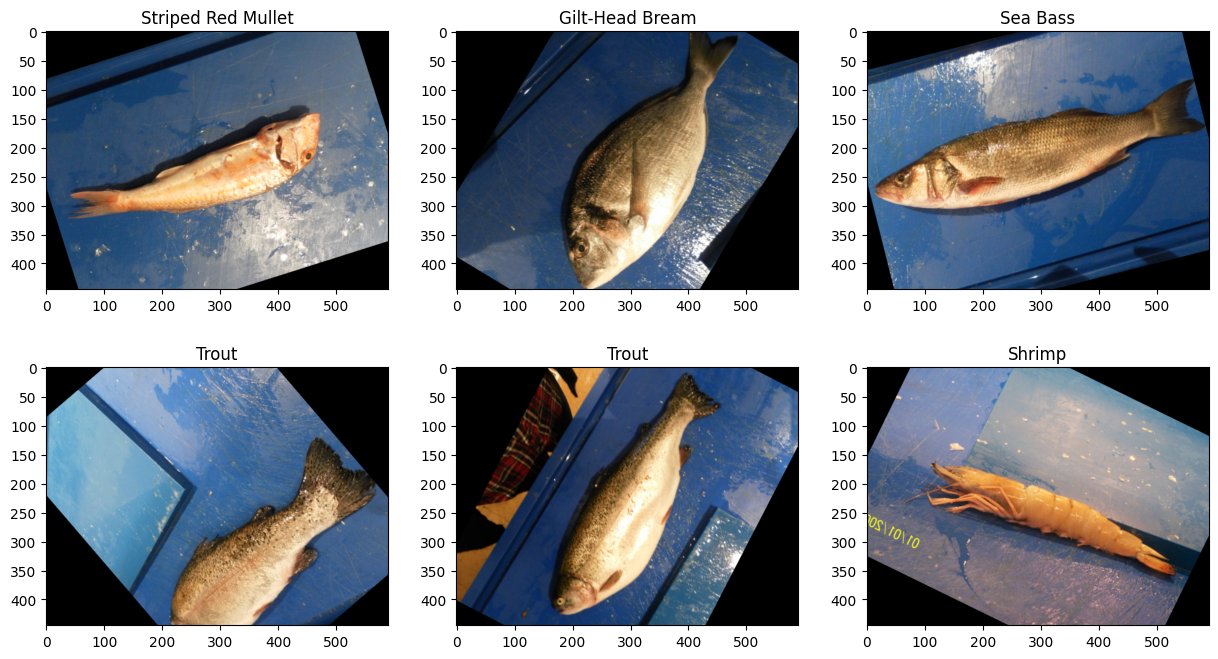

In [ ]:
print(pred_df[pred_df['label']==pred_df['pred']].head(6))
fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
imlist=pred_df[pred_df['label']==pred_df['pred']].head(6).reset_index()
for i in range(0,6):
    ax[i].imshow(plt.imread(imlist['path'][i]))
    ax[i].set_title(imlist['label'][i])

## **ResNet**

In [14]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet import preprocess_input as preprocess_resnet_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainGen_resnet = ImageDataGenerator(preprocessing_function=preprocess_resnet_input, validation_split=0.3)
testGen_resnet =ImageDataGenerator(preprocessing_function= preprocess_resnet_input)
X_train_img_resnet = trainGen_resnet.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',
                                                         class_mode='categorical', subset='training',
                                                         color_mode='rgb', batch_size=64)
X_val_img_resnet = trainGen_resnet.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',
                                                       class_mode='categorical', subset='validation',
                                                       color_mode='rgb', batch_size=64)
X_test_img_resnet =testGen_resnet.flow_from_dataframe(dataframe=X_test, x_col='path', y_col='label',
                                                      class_mode='categorical',
                                                      color_mode='rgb', batch_size=64, shuffle=False)

Found 5060 validated image filenames belonging to 9 classes.
Found 2168 validated image filenames belonging to 9 classes.
Found 1808 validated image filenames belonging to 9 classes.


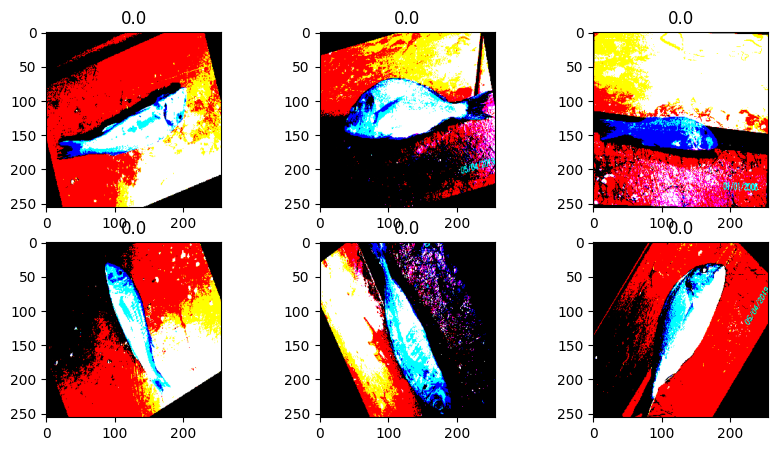

In [15]:
fit_resnet, ax_resnet= plt.subplots(nrows=2, ncols=3, figsize=(10,5))
ax_resnet=ax_resnet.flatten()
j=0
for _ in range(6):
    img_resnet, label_resnet = X_test_img_resnet.next()
    #print(img.shape)   #  (1,256,256,3)
    ax_resnet[j].imshow(img_resnet[0],)
    ax_resnet[j].set_title(label_resnet[0][0])
    #plt.show()
    j=j+1

In [16]:
X_test_img_resnet[0][0].shape

(64, 256, 256, 3)

In [17]:
image_shape=(256,256,3)

In [18]:
X_train_img_resnet.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [19]:
X_val_img_resnet.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [20]:
X_test_img_resnet.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [21]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ResNet50
pre_trained_resnet = ResNet50(include_top=False, pooling='avg', input_shape=image_shape)
pre_trained_resnet.trainable = False

inp_model_resnet = pre_trained_resnet.input
x_resnet = Dense(128, activation='relu')(pre_trained_resnet.output)
x_resnet = Dropout(0.5)(x_resnet)
x_resnet = Dense(128, activation='relu')(x_resnet)
output_resnet = Dense(9, activation='softmax')(x_resnet)
model_resnet = Model(inputs=inp_model_resnet, outputs=output_resnet)

model_resnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=1)

results_resnet = model_resnet.fit(X_train_img_resnet, epochs=30, validation_data=X_val_img_resnet, callbacks=[early_stop])

94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/30
80/80 [==============================] - 2038s 25s/step - loss: 0.7513 - accuracy: 0.7405 - val_loss: 0.0575 - val_accuracy: 0.9940
Epoch 2/30
80/80 [==============================] - 110s 1s/step - loss: 0.1323 - accuracy: 0.9613 - val_loss: 0.0168 - val_accuracy: 0.9968
Epoch 3/30
80/80 [==============================] - 107s 1s/step - loss: 0.0738 - accuracy: 0.9785 - val_loss: 0.0093 - val_accuracy: 0.9977
Epoch 4/30
80/80 [==============================] - 108s 1s/step - loss: 0.0533 - accuracy: 0.9836 - val_loss: 0.0049 - val_accuracy: 0.9986
Epoch 5/30
80/80 [==============================] - 107s 1s/step - loss: 0.0352 - accuracy: 0.9911 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 6/30
80/80 [==============================] - 108s 1s/step - loss: 0.0286 - accuracy: 0.9921 - val_loss: 0.0045 - val_accuracy: 0.9982


In [22]:
model_resnet.save("res_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Model Prediction**

In [23]:
from tensorflow.keras.models import load_model

loaded_model = load_model("res_model.h5")

In [24]:
predictions_resnet = loaded_model.predict(X_test_img_resnet)
pred_resnet=np.argmax(predictions_resnet,axis=1)

29/29 [==============================] - 439s 16s/step


In [25]:
pred_df_resnet=X_test.copy()
labels={}
for l,v in X_test_img_resnet.class_indices.items():
    labels.update({v:l})
pred_df_resnet['pred']=pred_resnet
pred_df_resnet['pred']=pred_df_resnet['pred'].apply(lambda x: labels[x])

Accuracy Score: 0.9961283185840708


<Axes: >

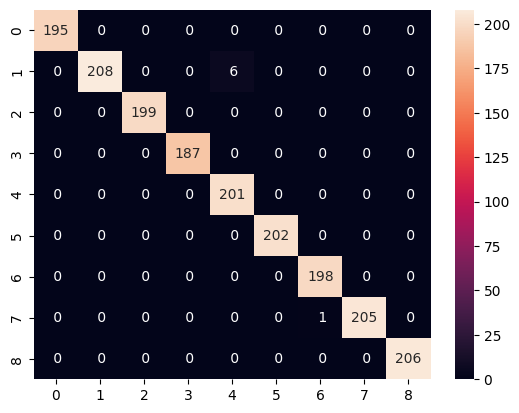

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy Score: {accuracy_score(pred_df_resnet['label'],pred_df_resnet['pred'])}")
sns.heatmap(confusion_matrix(pred_df_resnet['label'],pred_df_resnet['pred']), annot=True, fmt='2d')

                                                   path               label  \
8645  /content/drive/My Drive/dataset/kaggle_big_dat...  Striped Red Mullet   
1318  /content/drive/My Drive/dataset/kaggle_big_dat...     Gilt-Head Bream   
4785  /content/drive/My Drive/dataset/kaggle_big_dat...            Sea Bass   
7538  /content/drive/My Drive/dataset/kaggle_big_dat...               Trout   
7682  /content/drive/My Drive/dataset/kaggle_big_dat...               Trout   
6192  /content/drive/My Drive/dataset/kaggle_big_dat...              Shrimp   

                    pred  
8645  Striped Red Mullet  
1318     Gilt-Head Bream  
4785            Sea Bass  
7538               Trout  
7682               Trout  
6192              Shrimp  


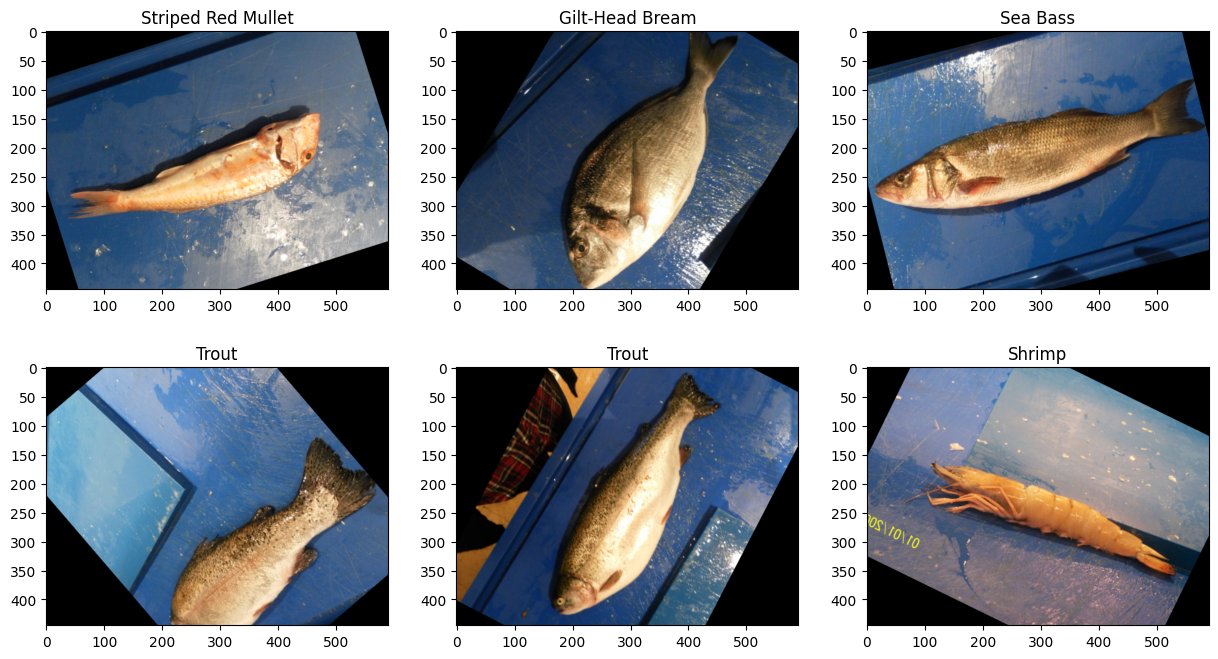

In [27]:
print(pred_df_resnet[pred_df_resnet['label']==pred_df_resnet['pred']].head(6))
fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
imlist=pred_df_resnet[pred_df_resnet['label']==pred_df_resnet['pred']].head(6).reset_index()
for i in range(0,6):
    ax[i].imshow(plt.imread(imlist['path'][i]))
    ax[i].set_title(imlist['label'][i])

## **VGG16**

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

trainGen_vgg16 = ImageDataGenerator(preprocessing_function=preprocess_vgg16_input, validation_split=0.3)
testGen_vgg16 = ImageDataGenerator(preprocessing_function=preprocess_vgg16_input)

X_train_img_vgg16 = trainGen_vgg16.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',
                                                               class_mode='categorical', subset='training',
                                                               color_mode='rgb', batch_size=64)
X_val_img_vgg16 = trainGen_vgg16.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',
                                                             class_mode='categorical', subset='validation',
                                                             color_mode='rgb', batch_size=64)
X_test_img_vgg16 = testGen_vgg16.flow_from_dataframe(dataframe=X_test, x_col='path', y_col='label',
                                                             class_mode='categorical', color_mode='rgb', batch_size=64,
                                                             shuffle=False)

Found 5060 validated image filenames belonging to 9 classes.
Found 2168 validated image filenames belonging to 9 classes.
Found 1808 validated image filenames belonging to 9 classes.


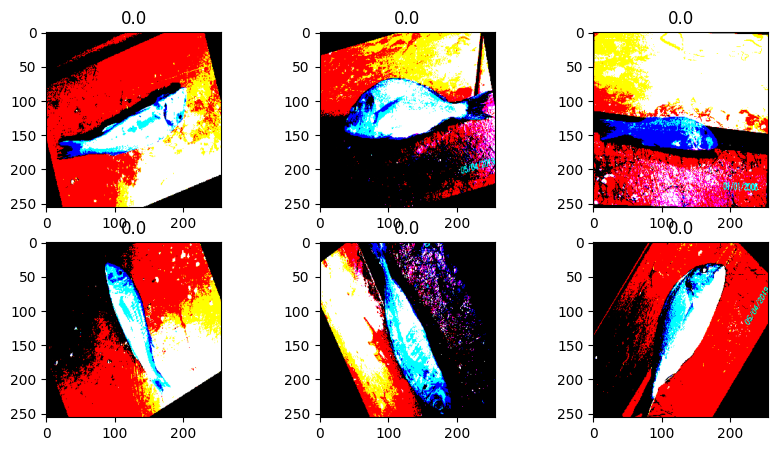

In [ ]:
fit_vgg16, ax_vgg16= plt.subplots(nrows=2, ncols=3, figsize=(10,5))
ax_vgg16=ax_vgg16.flatten()
j=0
for _ in range(6):
    img_vgg16, label_vgg16 = X_test_img_vgg16.next()
    #print(img.shape)   #  (1,256,256,3)
    ax_vgg16[j].imshow(img_vgg16[0],)
    ax_vgg16[j].set_title(label_vgg16[0][0])
    #plt.show()
    j=j+1

In [ ]:
X_test_img_vgg16[0][0].shape

(64, 256, 256, 3)

In [ ]:
image_shape=(256,256,3)

In [ ]:
X_train_img_vgg16.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [ ]:
X_val_img_vgg16.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [ ]:
X_test_img_vgg16.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

pre_trained_vgg = VGG16(include_top=False, pooling='avg', input_shape=image_shape)
pre_trained_vgg.trainable = False

inp_model_vgg = pre_trained_vgg.input
x_vgg = Dense(128, activation='relu')(pre_trained_vgg.output)
x_vgg = Dropout(0.5)(x_vgg)
x_vgg = Dense(128, activation='relu')(x_vgg)
output_vgg = Dense(9, activation='softmax')(x_vgg)
model_vgg = Model(inputs=inp_model_vgg, outputs=output_vgg)

model_vgg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=1)

results_vgg = model_vgg.fit(X_train_img_vgg16, epochs=30, validation_data=X_val_img_vgg16, callbacks=[early_stop])

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/30
80/80 [==============================] - 6215s 78s/step - loss: 1.2819 - accuracy: 0.6073 - val_loss: 0.1964 - val_accuracy: 0.9562
Epoch 2/30
80/80 [==============================] - 6143s 77s/step - loss: 0.3294 - accuracy: 0.8911 - val_loss: 0.0543 - val_accuracy: 0.9908
Epoch 3/30
69/80 [========================>.....] - ETA: 9:50 - loss: 0.1782 - accuracy: 0.9409 

In [ ]:
model_vgg.save("vgg_model.h5")

**Model Prediction**

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model("vgg_model.h5")

In [ ]:
predictions_vgg = loaded_model.predict(X_test_img_vgg16)
pred_vgg=np.argmax(predictions_vgg,axis=1)

In [ ]:
pred_df_vgg=X_test.copy()
labels={}
for l,v in X_test_img_vgg16.class_indices.items():
    labels.update({v:l})
pred_df_vgg['pred']=pred_vgg
pred_df_vgg['pred']=pred_df_vgg['pred'].apply(lambda x: labels[x])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy Score: {accuracy_score(pred_df_vgg['label'],pred_df_vgg['pred'])}")
sns.heatmap(confusion_matrix(pred_df_vgg['label'],pred_df_vgg['pred']), annot=True, fmt='2d')

In [ ]:
print(pred_df_vgg[pred_df_vgg['label']==pred_df_vgg['pred']].head(6))
fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
imlist=pred_df_vgg[pred_df_vgg['label']==pred_df_vgg['pred']].head(6).reset_index()
for i in range(0,6):
    ax[i].imshow(plt.imread(imlist['path'][i]))
    ax[i].set_title(imlist['label'][i])

## **Inception (GoogleNet)**

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inception_v3_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3

trainGen_inception = ImageDataGenerator(preprocessing_function=preprocess_inception_v3_input, validation_split=0.3)
testGen_inception = ImageDataGenerator(preprocessing_function=preprocess_inception_v3_input)

X_train_img_inception = trainGen_inception.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',
                                                               class_mode='categorical', subset='training',
                                                               color_mode='rgb', batch_size=64)
X_val_img_inception = trainGen_inception.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',
                                                             class_mode='categorical', subset='validation',
                                                             color_mode='rgb', batch_size=64)
X_test_img_inception = testGen_inception.flow_from_dataframe(dataframe=X_test, x_col='path', y_col='label',
                                                             class_mode='categorical', color_mode='rgb', batch_size=64,
                                                             shuffle=False)

Found 5060 validated image filenames belonging to 9 classes.
Found 2168 validated image filenames belonging to 9 classes.
Found 1808 validated image filenames belonging to 9 classes.


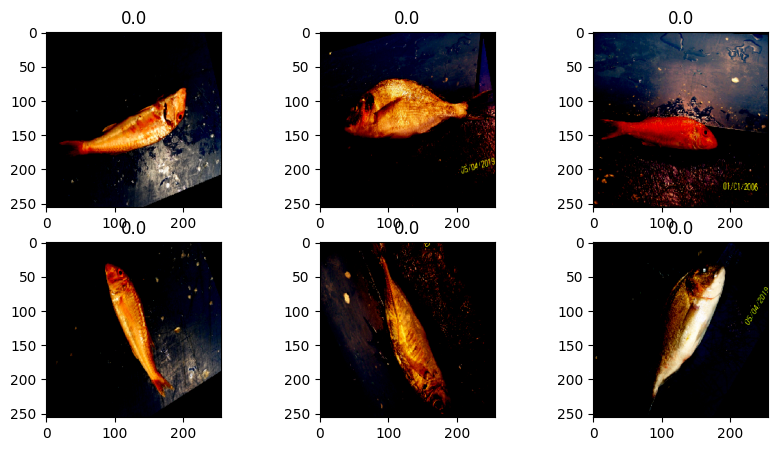

In [ ]:
fit_inception, ax_inception= plt.subplots(nrows=2, ncols=3, figsize=(10,5))
ax_inception=ax_inception.flatten()
j=0
for _ in range(6):
    img_inception, label_inception = X_test_img_inception.next()
    #print(img.shape)   #  (1,256,256,3)
    ax_inception[j].imshow(img_inception[0],)
    ax_inception[j].set_title(label_inception[0][0])
    #plt.show()
    j=j+1

In [ ]:
X_test_img_inception[0][0].shape

(64, 256, 256, 3)

In [ ]:
image_shape=(256,256,3)

In [ ]:
X_train_img_inception.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [ ]:
X_val_img_inception.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [ ]:
X_test_img_inception.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping

pre_trained_inception = InceptionV3(include_top=False, pooling='avg', input_shape=image_shape)
pre_trained_inception.trainable = False

inp_model_inception = pre_trained_inception.input
x_inception = Dense(128, activation='relu')(pre_trained_inception.output)
x_inception = Dropout(0.5)(x_inception)
x_inception = Dense(128, activation='relu')(x_inception)
output_inception = Dense(9, activation='softmax')(x_inception)
model_inception = Model(inputs=inp_model_inception, outputs=output_inception)

model_inception.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=1)

results_inception = model_inception.fit(X_train_img_inception, epochs=30, validation_data=X_val_img_inception, callbacks=[early_stop])

87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/30
80/80 [==============================] - 2585s 32s/step - loss: 0.9218 - accuracy: 0.6796 - val_loss: 0.1965 - val_accuracy: 0.9502
Epoch 2/30
80/80 [==============================] - 1398s 17s/step - loss: 0.2919 - accuracy: 0.9004 - val_loss: 0.1081 - val_accuracy: 0.9654
Epoch 3/30
80/80 [==============================] - 1382s 17s/step - loss: 0.1954 - accuracy: 0.9336 - val_loss: 0.0825 - val_accuracy: 0.9709
Epoch 4/30
80/80 [==============================] - 1385s 17s/step - loss: 0.1633 - accuracy: 0.9498 - val_loss: 0.0568 - val_accuracy: 0.9834
Epoch 5/30
80/80 [==============================] - 1405s 18s/step - loss: 0.1233 - accuracy: 0.9579 - val_loss: 0.0377 - val_accuracy: 0.9889
Epoch 6/30
80/80 [==============================] - 1390s 17s/step - loss: 0.1106 - accuracy: 0.9621 - val_loss: 0.0359 - val_accuracy: 0.9889
Epoch 7/30
80/80 [==============================] - 1400s 18s/step - loss: 0.

In [ ]:
model_inception.save("google_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Model Prediction**

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model("google_model.h5")

In [ ]:
predictions_inception = loaded_model.predict(X_test_img_inception)
pred_inception=np.argmax(predictions_inception,axis=1)

29/29 [==============================] - 366s 12s/step


In [ ]:
pred_df_inception=X_test.copy()
labels={}
for l,v in X_test_img_inception.class_indices.items():
    labels.update({v:l})
pred_df_inception['pred']=pred_inception
pred_df_inception['pred']=pred_df_inception['pred'].apply(lambda x: labels[x])

Accuracy Score: 0.9900442477876106


<Axes: >

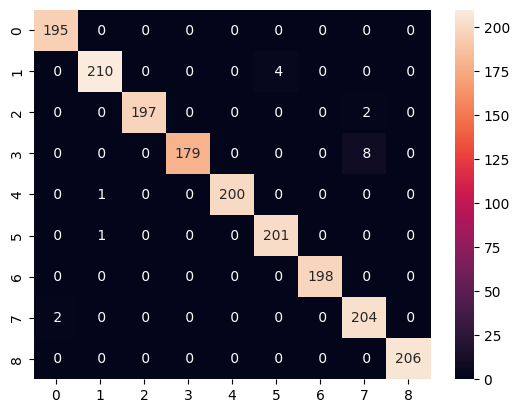

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy Score: {accuracy_score(pred_df_inception['label'],pred_df_inception['pred'])}")
sns.heatmap(confusion_matrix(pred_df_inception['label'],pred_df_inception['pred']), annot=True, fmt='2d')

                                                   path               label  \
8645  /content/drive/My Drive/dataset/kaggle_big_dat...  Striped Red Mullet   
1318  /content/drive/My Drive/dataset/kaggle_big_dat...     Gilt-Head Bream   
4785  /content/drive/My Drive/dataset/kaggle_big_dat...            Sea Bass   
7538  /content/drive/My Drive/dataset/kaggle_big_dat...               Trout   
7682  /content/drive/My Drive/dataset/kaggle_big_dat...               Trout   
6192  /content/drive/My Drive/dataset/kaggle_big_dat...              Shrimp   

                    pred  
8645  Striped Red Mullet  
1318     Gilt-Head Bream  
4785            Sea Bass  
7538               Trout  
7682               Trout  
6192              Shrimp  


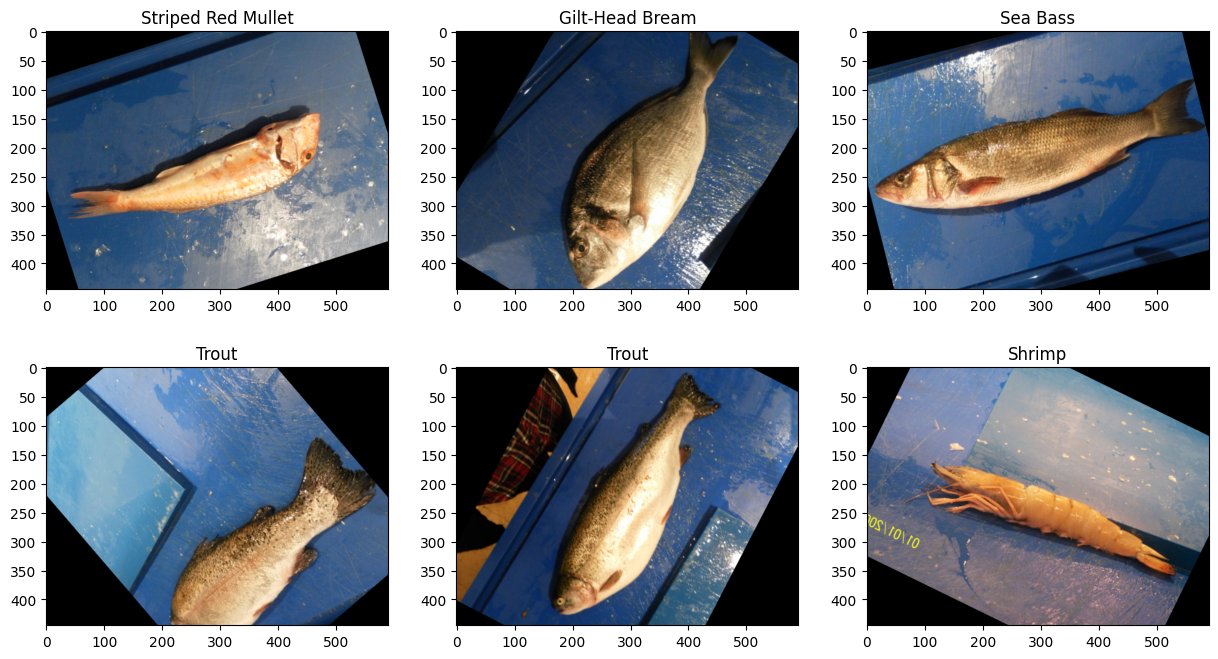

In [ ]:
print(pred_df_inception[pred_df_inception['label']==pred_df_inception['pred']].head(6))
fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
imlist=pred_df_inception[pred_df_inception['label']==pred_df_inception['pred']].head(6).reset_index()
for i in range(0,6):
    ax[i].imshow(plt.imread(imlist['path'][i]))
    ax[i].set_title(imlist['label'][i])